In [39]:
from class_microlensing import Microlensing
import numpy as np
import sys
import time
import matplotlib.pyplot as plt
from tqdm import tqdm
plt.rc("font", family="serif")
plt.rc("text", usetex=True)
from astropy.cosmology import FlatLambdaCDM

In [14]:
M = Microlensing(1, 1, 1, 1, 1, 1, 1, 1, 1)
kgs = [0.362000, 0.280000, 0.910]

peak_contr = []

N_runs = 500
tqdm._instances.clear()
pbar = tqdm(total=N_runs, position=0, leave=True)

for n in range(N_runs):
    SN_model = np.random.choice(["m", "n", "w", "s"])
    curves = M.micro_lightcurve(kgs, source_redshift=0.8, SN_model=SN_model)
    peak_contr.append(curves['micro_i'][20] - curves['macro_i'][20])
    pbar.update(1)

100%|███████████████████████████████████████████████| 500/500 [01:49<00:00,  4.66it/s]

In [ ]:
# print(peak_contr)

In [17]:
print("Mean: ", np.mean(peak_contr))
print("Median: ", np.median(peak_contr))

Mean:  0.02183600000000029
Median:  0.0940000000000012


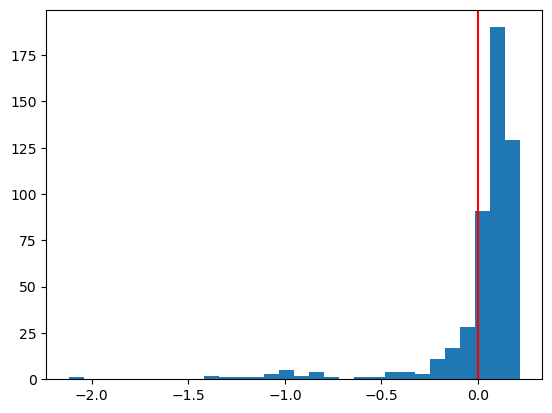

In [16]:
plt.hist(peak_contr, bins=30)
plt.axvline(x=0, color='red')

In [26]:
M = Microlensing(1, 1, 1, 1, 1, 1, 1, 1, 1)
kgs = [9.564962670984238358e-01, 9.517424234642006819e-01, 4.430360463808165061e-01]

peak_contr = []

N_runs = 2000
tqdm._instances.clear()
pbar = tqdm(total=N_runs, position=0, leave=True)

for n in range(N_runs):
    SN_model = np.random.choice(["m", "n", "w", "s"])
    curves = M.micro_lightcurve(kgs, source_redshift=0.8, SN_model=SN_model)
    peak_contr.append(np.median(curves['micro_i'] - curves['macro_i']))
    pbar.update(1)

100%|█████████████████████████████████████████████| 2000/2000 [07:08<00:00,  4.26it/s]

Mean delta m_i:  0.413506
Median delta m_i:  0.5249999999999986


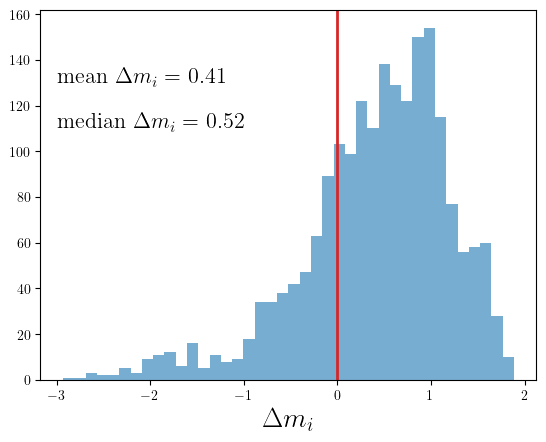

In [38]:
plt.hist(peak_contr, bins=40, alpha=0.6)
plt.axvline(x=0, color='C3', lw=2)
plt.xlabel(r"$\Delta m_i$", fontsize=20)
plt.text(-3, 130, r"mean $\Delta m_i = $ " + str(np.around(np.mean(peak_contr), 2)), fontsize=16)
plt.text(-3, 110, r"median $\Delta m_i = $ " + str(np.around(np.median(peak_contr), 2)), fontsize=16)
# plt.savefig("../Results/Figures/ml4im_DeltaMi.png", transparent=False, facecolor='white', dpi=250, bbox_inches='tight')

print("Mean delta m_i: ", np.mean(peak_contr))
print("Median delta m_i: ", np.median(peak_contr))

In [23]:
 peak_contr

[0.7720000000000002,
 0.8049999999999997,
 1.0070000000000014,
 1.3889999999999993,
 -0.3050000000000015,
 0.9490000000000016,
 -0.14899999999999913,
 1.3249999999999993,
 0.7810000000000024,
 1.0779999999999994]

In [49]:
M = -19.4
z_lens = 0.3
z_source = 0.9
H_0 = 67.8
cosmo = FlatLambdaCDM(H0=H_0, Om0=0.315)
macro_mag = np.array([1, 1]) * 10

m = M + cosmo.distmod(z_source).value
ml = M + cosmo.distmod(z_lens).value
m -= 2.5 * np.log10(macro_mag)


print(ml)
print(m)

21.617740546895014
[21.96922425 21.96922425]


In [50]:
import traceback

In [54]:


m = M_i + cosmo.distmod(z_lens).value

ValueError: zero-size array to reduction operation maximum which has no identity

In [1]:
import numpy as np

H_0_fid = 74.03                                  
M_fid = -19.24  
H_0 = 67.8

M_cosmo = 5 * np.log10(H_0 / H_0_fid) + M_fid  

print(M_cosmo)

-19.430890277575692
